<a href="https://colab.research.google.com/github/jwalx/Tensorflow/blob/main/01_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

# Introduction to regression with neural network
There are many definition for a regression problem but in our case, we're goin to simplify it: predicting a numerical variable based on some other combination of variable, even shorter... predicting a number. 

In [ ]:
print(tf.__version__)

2.9.2


## Creating some data to view and fit


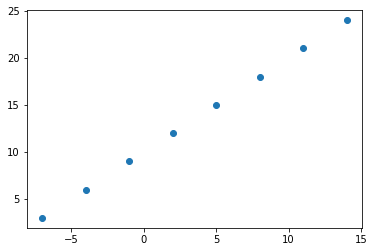

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X,y);

In [ ]:
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X.dtype,y.dtype

(tf.float32, tf.float32)

In [ ]:
y==X+10

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>

# Input and Output Shapes

In [ ]:
#creat a demo tensor for our housing prediction problem 
house_info =tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939,000])
house_info,house_price 

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([939,   0], dtype=int32)>)

## Steps on modelling with Tensorflow

1. Creating a model - define the input and ouput layers, as well as the hidden layers of th deep learning model.
2. Compling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning)  and evaluation (what we can use to interpret the performance of our model).
3. Fitting a model - letting a model try to find patterns between X and y(features and labels)**bold text**

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# create a model using the Squential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,   # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(),  # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)



Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# try and make a prediction using our model
y_pred =model.predict([17.0])
y_pred

1/1 [==============================] - 0s 63ms/step


array([[12.716021]], dtype=float32)

## Improve the model

we can improve our model, by latering the steps we took to create a model.

1. **Creating a model** - here w emight add more layers,
increase the number of hidden units(all called neurons)
within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).


In [ ]:
# Let's rebuild our model

# 1.Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2.Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 293ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 

In [ ]:
X,y
model.predict([17.0])

1/1 [==============================] - 0s 209ms/step


array([[29.739855]], dtype=float32)

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(lr=0.01),
               metrics = "mae")
model2.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 532ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 10.4149 - mae: 10.4149
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 9.0103 - mae: 9.0103
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.3316 - mae: 7.3316
Epoch 11/100
1/1 [==============================] - 0s 17ms/step - loss: 7.

In [ ]:
model2.predict([17.0])

1/1 [==============================] - 0s 88ms/step


array([[26.583801]], dtype=float32)

## `Learning Rate` is the most important hyperparameter

# Evaluting a model 

In Practice, a typical workflow you'll go through when building neural network is:

```
Build a model --> fit it --> evaluate it --> tweak a model --> fit it -->
evaluate it --> tweak a model --> fit it --> evaluate it ...
```

When it comes to evaluation.. there are 3 words you should memorize:

"Visualize,Visualize,Visualize"

It's a good idea to visualize:
* the data - what data are we working with? what does it look like
* the model itself - what does our model look like?
* The training data a model - how does a model perform while it learns?
* The prediction of the model - how do the prediction of a model line up against the ground truth 

In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y=X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

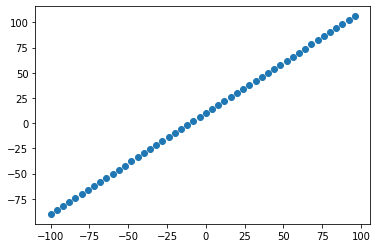

In [ ]:
import matplotlib.pyplot as plt
plt.scatter (X,y)

### The 3 sets

* Training set - the model learns fom this data,which is typically 70-80% of the total data you have available.
* Validation set - The model gets tuned on this data, this is generally 10-15% of the data.
* Test set - The model gets evaluated on device to test what is learned, this set is typically 10-15% og the data.


In [ ]:
# check lenght of the dataset
len(X)

50

In [ ]:
# splitting the data into train and test sets
X_train=X[:40]
y_train = X[:40]

X_test=X[40:]
y_test=X[40:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

# Visualizing the data


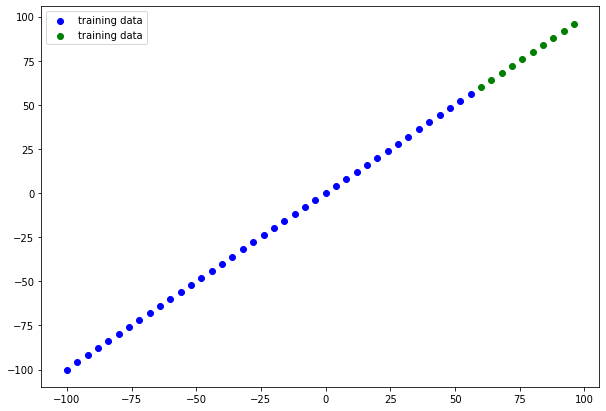

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b",label="training data")
plt.scatter(X_test,y_test,c="g",label="training data")
plt.legend();

In [ ]:
# let's have a look at how to build a neural network for our data

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics =["mae"])

# fit the model
#model.fit(X_train,y_train,epoch=100)

In [ ]:
# visualizing the model
#model.summary()

In [ ]:
# Let's create model which builds automatically by defining the input shape argument
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="one_of_the_starting_models..")

#Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(lr=0.0001),
              metrics =["mae"])

# fit the model
#model.fit(X_train,y_train,epoch=100)


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters(pattern) the model can update as it trains
* Non rainable params - these params aren't updated during training (this is typical when you bring already learnt patterns or parameters from other models during
**Transfer learning** 

In [ ]:
model.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 37.3078 - mae: 37.3078
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 35.9307 - mae: 35.9307
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 34.4697 - mae: 34.4697
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 33.0537 - mae: 33.0537
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 31.6431 - mae: 31.6431
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 30.3038 - mae: 30.3038
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 28.9669 - mae: 28.9669
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 27.5281 - mae: 27.5281
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 25.8795 - mae: 25.8795
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 24.4017 - mae: 24.4017
Epoch 11/100
2/2 [==============================] - 0s 8ms

In [ ]:
model.summary()

Model: "one_of_the_starting_models.."
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


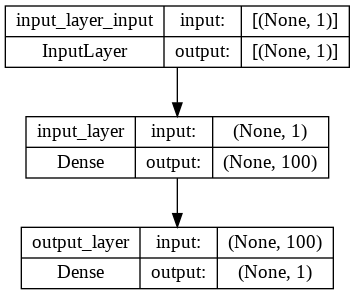

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes =True)

## visualizing our model's prediction

to visualize prediction, it's a good idea to plot them against the ground truth labels

often you'll see this in the form of `y_test` or `y_true` verus `y_pred`

In [ ]:
# make some prediction
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 60ms/step


array([[61.128105],
       [65.20354 ],
       [69.27897 ],
       [73.35441 ],
       [77.42984 ],
       [81.50527 ],
       [85.5807  ],
       [89.656136],
       [93.73157 ],
       [97.807   ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

### If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to type them as functions



In [ ]:
#let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  
  """
  Plots training data, test data and compare predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",label = "training data")
  plt.scatter(test_data,test_labels,c="g",label = "testing data")
  
  #plot model predictions in red
  plt.scatter(test_data,predictions,c="r",label="prediction")
  plt.legend();

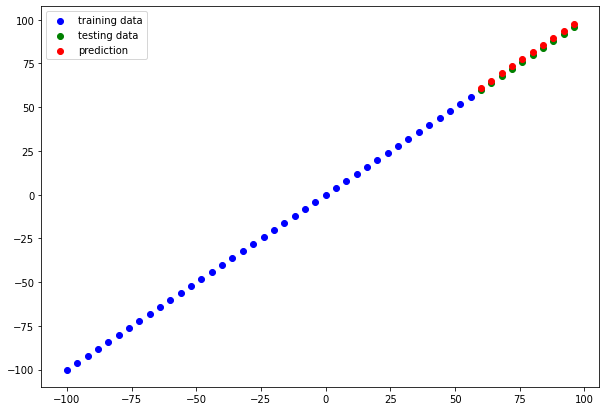

In [ ]:
plot_predictions()

### Evalauting our model's predictions with regression evaluation metrics

Depending on the problem you're working on,there will be different evaluation metrics to evaluate your model's performance Since we're working on a regression, two of the main metrics:

* MAE-mean absolute error,"on average,how wrong each of my model's predictions"
* MSE-mean square error,"square the average errors"

In [ ]:
# Evaluate the model on the test 
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 220ms/step - loss: 1.4676 - mae: 1.4676


[1.467553734779358, 1.467553734779358]

In [ ]:
tf.metrics.mean_absolute_error(y_true= y_test,
                               y_pred=tf.constant(y_pred))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.097515 , 14.077878 , 11.888412 , 10.529119 , 10.       ,
       10.301054 , 11.4322815, 13.393682 , 16.185253 , 19.807    ],
      dtype=float32)>

In [ ]:
y_pred=tf.constant(y_pred)


In [ ]:
# Calulate the mean absolute error
mae= tf.metrics.mean_absolute_error(y_true = y_test,
                                    y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.4675537>

In [ ]:
mse = tf.metrics.mean_squared_error(y_true= y_test,
                                    y_pred= tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=2.2006574>

In [ ]:
huber = tf.keras.losses.Huber()
huber(y_true= y_test,
      y_pred = tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.96755373>

In [ ]:
# Functionizing mae and mse 
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))
  
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true= y_true,
                                       y_pred=tf.squeeze(y_pred))
def huber(y_true,y_pred):
  return huber(y_true= y_true,
               y_pred=y_pred)
  

### Running experiments to improve our model

1. Get more data - get more examples for the model to train on.
2. Make your model larger(using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of chance to find patterns in data.


Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer,trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 100 epochs.

In [ ]:
X_train,y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>)

### BUILDING `MODEL_1`

In [ ]:
#Set random seed
tf.random.set_seed(42)

#creating model_1
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,input_shape=[1])
])

# Compiling model_1
model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"]),
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 15.3155 - mae: 15.3155
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 12.7969 - mae: 12.7969
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 14.6829 - mae: 14.6829
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 14.4182 - mae: 14.4182
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 15.2908 - mae: 15.2908
Epoch 6/100
2/2 [==============================] - 0s 23ms/step - loss: 13.1122 - mae: 13.1122
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 9.8898 - mae: 9.8898
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 8.2459 - mae: 8.2459
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 14.4503 - mae: 14.4503
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 17.1168 - mae: 17.1168
Epoch 11/100
2/2 [==============================] - 0s 4ms/st

1/1 [==============================] - 0s 155ms/step


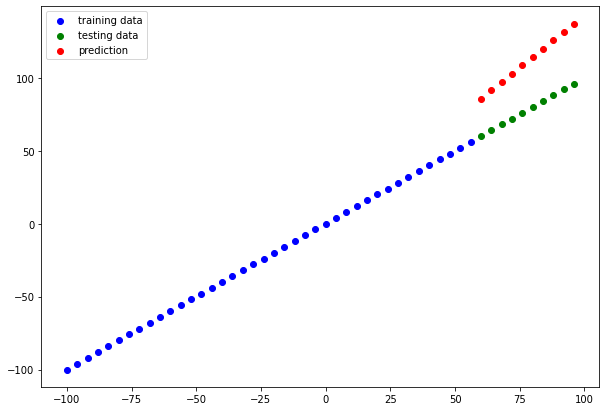

In [ ]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
#Calucalte model_1 evaluation metrics
mae_1 =mae(y_test,y_preds_1)
mse_1 =mse(y_test,y_preds_1)

mae_1 , mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=33.441246>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1142.5887>)

## Building `model 2`


In [ ]:
#set the random seed
tf.random.set_seed(42)
# creating model_2 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)
])

#compiling model_2
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

#fitting model_2
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 28.5179 - mse: 1169.6488
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 23.5481 - mse: 795.0546
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 30.3879 - mse: 1480.5627
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 30.0180 - mse: 1317.8601
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 11.3066 - mse: 220.3869
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 14.9600 - mse: 316.0143
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 15.8804 - mse: 361.8179
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 17.7428 - mse: 484.7431
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 46.8813 - mse: 3729.8250
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 30.8266 - mse: 1382.1410
Epoch 11/100
2/2 [=======================

1/1 [==============================] - 0s 65ms/step


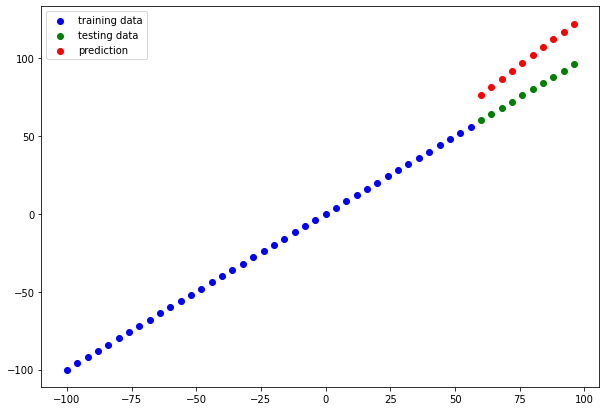

In [ ]:
# make plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [ ]:
#calculate evaluation metrics for model_2
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)

mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=21.267136>,
 <tf.Tensor: shape=(), dtype=float32, numpy=462.17188>)

## Building model_3


In [ ]:
#set the random seed
tf.random.set_seed(42)
 
#creating model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)
])

#compile model_3
model_3.compile(loss = tf.keras.losses.mae,
                optimizer =tf.keras.optimizers.SGD(),
                metrics=["mse"])

#fitting model_3
model_3.fit(X_train,y_train,epochs = 500)



Epoch 1/500
2/2 [==============================] - 0s 12ms/step - loss: 28.5179 - mse: 1169.6488
Epoch 2/500
2/2 [==============================] - 0s 13ms/step - loss: 23.5481 - mse: 795.0546
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 30.3879 - mse: 1480.5627
Epoch 4/500
2/2 [==============================] - 0s 14ms/step - loss: 30.0180 - mse: 1317.8601
Epoch 5/500
2/2 [==============================] - 0s 22ms/step - loss: 11.3066 - mse: 220.3869
Epoch 6/500
2/2 [==============================] - 0s 11ms/step - loss: 14.9600 - mse: 316.0143
Epoch 7/500
2/2 [==============================] - 0s 14ms/step - loss: 15.8804 - mse: 361.8179
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 17.7428 - mse: 484.7431
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 46.8813 - mse: 3729.8250
Epoch 10/500
2/2 [==============================] - 0s 14ms/step - loss: 30.8266 - mse: 1382.1410
Epoch 11/500
2/2 [===================

1/1 [==============================] - 0s 63ms/step


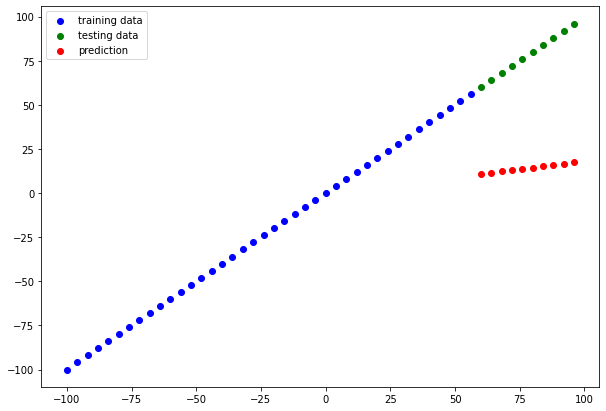

In [ ]:
y_preds_3 =model_3.predict(y_test)
y_preds_3
plot_predictions(predictions= y_preds_3)

In [ ]:
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)

mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=63.941357>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4176.5786>)

## Comparing the results of the Experiments

In [ ]:
# Let's compare our model's results using a pandas dataframe

import pandas as pd

model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                 ["model_2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3",mae_3.numpy(),mse_3.numpy()]]
all_results = pd.DataFrame(model_results,columns= ["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,33.441246,1142.588745
1,model_2,21.267136,462.171875
2,model_3,63.941357,4176.578613


# Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so,it can be tedious if you're running lots of experiments.

Luckily, we have tools for that.

* TensorBoard - a component of the Tensorflow library to help track modelling experiments(we'll see this one later).
* Weights and Bias -  a tool for tracking all of kinds of machine learning experiments(plugs straight into TensorBoard)

### Saving our models

Saving the models allows us to use them oustide colab

There are two main format we can save  our model

1. The saved model format
2. The HDF5 form format(converts into a universal data language)

In [ ]:
# Save model using Saved model format
model_2.save("best_model_SavedModel_format")

In [ ]:
# Save model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

# Loading in a Save model 

In [ ]:
# Loading in the SavedModel format
loaded_SavedModel_format=tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# A larger Example

In [ ]:
# importing required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
# Read the insurance dataset
insurance =pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


1. Create X and y values(features and labels) and normalization and standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), #turn all values in between 0 and 1
    (OneHotEncoder(handle_unknown = "ignore"),["sex","smoker","region"])
)
X = insurance.drop("charges",axis=1)
y= insurance["charges"]


In [ ]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


2. Create training and test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
# fit the column tranformer to our training data
ct.fit(X_train)

#transform training and test data with normalizaton(MinMaxScalar) and OneHotEncoder

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



3. Builing neural network

In [ ]:
# set random seed
tf.random.set_seed(42)

#create model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compiling model
insurance_model.compile(loss =tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=["mae"])

#fit the model
insurance_model.fit(X_train_normal,y_train,epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13344.3066 - mae: 13344.3066
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13339.4785 - mae: 13339.4785
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13325.8740 - mae: 13325.8740
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13284.3896 - mae: 13284.3896
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13156.0547 - mae: 13156.0547
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 12756.2744 - mae: 12756.2744
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 11604.6357 - mae: 11604.6357
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 9815.3809 - mae: 9815.3809
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 8611.2627 - mae: 8611.2627
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 8165.9160 - 

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
#check results of model on the test data
insurance_model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3170.0483 - mae: 3170.0483


[3170.04833984375, 3170.04833984375]

To improve our model with more hidden units
1. Add an extra layer with more hidden units.
2. Train for longer
3. (insert you own experiment here)

In [ ]:
# Set seed
tf.random.set_seed(42)

#create model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

#compile
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                          metrics = ["mae"])

#fitting the model

history =insurance_model_2.fit(X_train_normal,y_train,epochs=200)


Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 1s 4ms/step - loss: 13054.3789 - mae: 13054.3789
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 9219.5547 - mae: 9219.5547
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 7614.8081 - mae: 7614.8081
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 6733.3765 - mae: 6733.3765
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 5401.8784 - mae: 5401.8784
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 4037.2131 - mae: 4037.2131
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 3598.4866 - mae: 3598.4866
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 3457.5806 - mae: 3457.5806
Epoch 9/200
34/34 [==============================] - 0s 5ms/step - loss: 3376.8877 - mae: 3376.8877
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 3314.9265 - mae: 3314.9265
Epoch 11/

In [ ]:
insurance_model_2.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1729.7662 - mae: 1729.7662


[1729.7662353515625, 1729.7662353515625]

Text(0.5, 0, 'epochs')

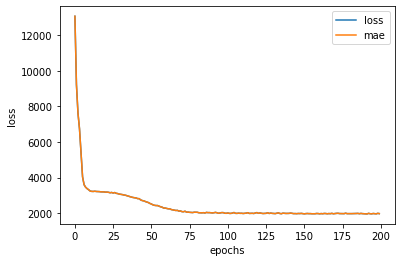

In [ ]:
# Plot history(also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# preprocessing data (normalization and standardization).
 refer a large example
 


# to prepare our data, we can borrow few classes from Scikit-Learn
`from sklearn.preprocessing import MinMaxScaler,OneHotEncoder`
`from sklearn.compose import make_column_transformer`
`from sklearn.model_selection import train_test_split`

# create a column transformer
`ct = make_column_transformer(`
    (`MinMaxScaler(),["age","bmi","children"]), #turn all values in between 0 and 1`
    `(OneHotEncoder(handler_unknown = "ignore"),["sex","smoker","region"])`
)`````

# Extra Exercise

In [ ]:
#set seef
tf.random.set_seed(42)

#Create model_3
insurance_model_3 =tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="softplus"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="softplus"),
    tf.keras.layers.Dense(1)
])

#compile
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(0.1),
                          metrics = ["mae"])

insurance_model_3.fit(X_train_normal,y_train,epochs = 300)

Epoch 1/300
34/34 [==============================] - 1s 3ms/step - loss: 5885.8745 - mae: 5885.8745
Epoch 2/300
34/34 [==============================] - 0s 3ms/step - loss: 4000.6982 - mae: 4000.6982
Epoch 3/300
34/34 [==============================] - 0s 3ms/step - loss: 4280.1362 - mae: 4280.1362
Epoch 4/300
34/34 [==============================] - 0s 3ms/step - loss: 3650.0989 - mae: 3650.0989
Epoch 5/300
34/34 [==============================] - 0s 3ms/step - loss: 3030.5154 - mae: 3030.5154
Epoch 6/300
34/34 [==============================] - 0s 3ms/step - loss: 3368.9360 - mae: 3368.9360
Epoch 7/300
34/34 [==============================] - 0s 3ms/step - loss: 4568.3945 - mae: 4568.3945
Epoch 8/300
34/34 [==============================] - 0s 3ms/step - loss: 3029.1592 - mae: 3029.1592
Epoch 9/300
34/34 [==============================] - 0s 3ms/step - loss: 2631.3389 - mae: 2631.3389
Epoch 10/300
34/34 [==============================] - 0s 3ms/step - loss: 2580.0969 - mae: 2580.0969

In [ ]:
insurance_model_3.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1391.9830 - mae: 1391.9830


[1391.9830322265625, 1391.9830322265625]

# Boston Data

In [ ]:
(X_train_1,y_train_1),(X_test_1,y_test_1) =tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=42
)

In [ ]:
len(X_train_1),len(y_train_1),len(X_test_1),len(y_test_1)

(404, 404, 102, 102)

In [ ]:
X_train_1.shape

(404, 13)

In [ ]:
#Set random seed
tf.random.set_seed(42)

#creating model
boston_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(150,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

#Compiling
boston_model_1.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(lr =0.001),
                       metrics=["mae"])

history=boston_model_1.fit(X_train_1,y_train_1,epochs=300)

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


13/13 [==============================] - 1s 3ms/step - loss: 16.3185 - mae: 16.3185
Epoch 2/300
13/13 [==============================] - 0s 3ms/step - loss: 6.7138 - mae: 6.7138
Epoch 3/300
13/13 [==============================] - 0s 3ms/step - loss: 5.7829 - mae: 5.7829
Epoch 4/300
13/13 [==============================] - 0s 3ms/step - loss: 5.4603 - mae: 5.4603
Epoch 5/300
13/13 [==============================] - 0s 3ms/step - loss: 5.2261 - mae: 5.2261
Epoch 6/300
13/13 [==============================] - 0s 3ms/step - loss: 5.9428 - mae: 5.9428
Epoch 7/300
13/13 [==============================] - 0s 3ms/step - loss: 5.2846 - mae: 5.2846
Epoch 8/300
13/13 [==============================] - 0s 3ms/step - loss: 5.1930 - mae: 5.1930
Epoch 9/300
13/13 [==============================] - 0s 3ms/step - loss: 6.0017 - mae: 6.0017
Epoch 10/300
13/13 [==============================] - 0s 3ms/step - loss: 5.8031 - mae: 5.8031
Epoch 11/300
13/13 [==============================] - 0s 3ms/step - l

In [ ]:
boston_model_1.evaluate(X_test_1,y_test_1)

4/4 [==============================] - 0s 3ms/step - loss: 2.8344 - mae: 2.8344


[2.834381103515625, 2.834381341934204]

Text(0, 0.5, 'loss')

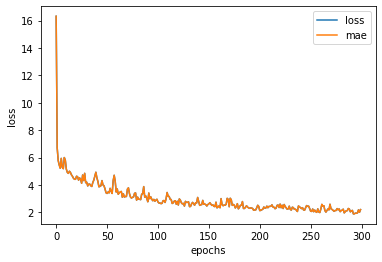

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")